In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
img_list = os.listdir("Lab_4") 
img_list.sort()
print(img_list)

['image_0001.jpg', 'image_0002.jpg', 'image_0003.jpg', 'image_0004.jpg', 'image_0005.jpg', 'image_0006.jpg', 'image_0007.jpg', 'image_0008.jpg', 'image_0009.jpg', 'image_0010.jpg']


In [8]:
def data_augmentation(img):
  width = img.shape[1]
  height = img.shape[0]

  for i in range(height):
    for j in range(width):
      img[i][5] = 254 - img[i][4]

  gamma = 0.5
  img = np.power(img, gamma)
  img = (img/np.max(img) * 255).astype(np.uint8)
  img = cv2.GaussianBlur(img, (3, 3), 0)
  src = np.float32([[0, 0], [0, height], [width, height], [width, 0]])
  dst = np.float32([[0, height], [0, 0], [width, 0], [width, height]])
  Mper = cv2.getPerspectiveTransform(src, dst)
  img = cv2.warpPerspective(img, Mper, (width, height) )
  M = np.float32([[1, 0, -width * 1 / 4], [0, 1, height * 1 / 5]])
  img = cv2.warpAffine(img, M, (width, height), borderValue = 255)
  m180 = cv2.getRotationMatrix2D((width / 2, height / 2), 180, 1)
  img = cv2.warpAffine(img, m180, (width, height))
  skew = np.float32([[1, 1, 1], [0, 1, 1]])
  img = cv2.warpAffine(img, skew, (width, height))
  return img

for i in img_list:
  img_path = os.path.join(r"Lab_4", i)
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  aug_path = os.path. join(r"Lab_4", "aug"+i)
  cv2.imwrite(aug_path, data_augmentation(img))
  print(aug_path +" saved!")

Lab_4/augimage_0001.jpg saved!
Lab_4/augimage_0002.jpg saved!
Lab_4/augimage_0003.jpg saved!
Lab_4/augimage_0004.jpg saved!
Lab_4/augimage_0005.jpg saved!
Lab_4/augimage_0006.jpg saved!
Lab_4/augimage_0007.jpg saved!
Lab_4/augimage_0008.jpg saved!
Lab_4/augimage_0009.jpg saved!
Lab_4/augimage_0010.jpg saved!


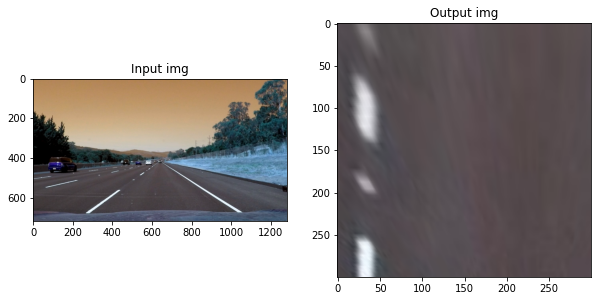

In [13]:
img = cv2.imread("test_img.jpg")

OUT_IMG_WIDTH = 500
OUT_IMG_HEIGHT = 500

src = np.float32([[590, 450], [695, 450], [1060, 662], [252, 662]])
dst = np.float32([[10, 10], [490, 10], [490, 490], [10, 490]])
M = cv2.getPerspectiveTransform(src, dst)
wraped_img = cv2.warpPerspective(img, M, (300, 300))

plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(img)
plt.title('Input img')
plt.subplot(122)
plt.imshow(wraped_img)
plt.title('Output img')
plt.show()